# Analyzing IMDB Data in Keras

In [3]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [4]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [5]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [7]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])
print(len(x_train[0]))


[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [8]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [9]:
# TODO: Build the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1000,)))
model.add(Dropout(.8))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))



# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
__________

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [12]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
#earlystopping 
callback=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0009, patience=2, verbose=0, mode='auto'),
          keras.callbacks.ModelCheckpoint(filepath='imdb.model.best.hdf5',verbose=1, save_best_only=True)
         ]

model_history=model.fit(x_train, y_train, epochs=100, batch_size=500, verbose=2, validation_split=0.2, callbacks=callback)

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.33034, saving model to imdb.model.best.hdf5
3s - loss: 0.3185 - acc: 0.8678 - val_loss: 0.3303 - val_acc: 0.8626
Epoch 2/100
Epoch 00001: val_loss did not improve
3s - loss: 0.3010 - acc: 0.8762 - val_loss: 0.3310 - val_acc: 0.8624
Epoch 3/100
Epoch 00002: val_loss improved from 0.33034 to 0.32485, saving model to imdb.model.best.hdf5
3s - loss: 0.2865 - acc: 0.8843 - val_loss: 0.3249 - val_acc: 0.8638
Epoch 4/100
Epoch 00003: val_loss did not improve
3s - loss: 0.2765 - acc: 0.8882 - val_loss: 0.3392 - val_acc: 0.8586
Epoch 5/100
Epoch 00004: val_loss did not improve
4s - loss: 0.2599 - acc: 0.8946 - val_loss: 0.3281 - val_acc: 0.8658
Epoch 6/100
Epoch 00005: val_loss did not improve
3s - loss: 0.2414 - acc: 0.9024 - val_loss: 0.3422 - val_acc: 0.8620
Epoch 7/100
Epoch 00006: val_loss did not improve
4s - loss: 0.2266 - acc: 0.9133 - val_loss: 0.3457 - val_acc: 0.8632
Epoch 8/100


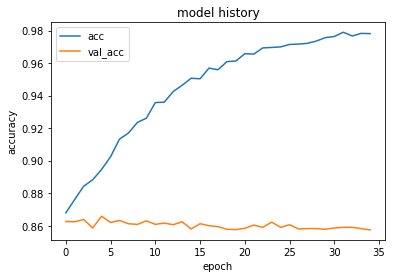

In [18]:
import matplotlib.pyplot as plt
#print(model_history.history.keys())
#print(model_history.history['acc'])
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

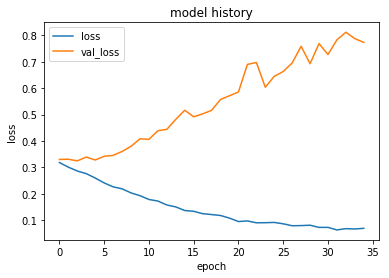

In [19]:
import matplotlib.pyplot as plt
#print(model_history.history.keys())
#print(model_history.history['acc'])
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [15]:
# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=1)
print("\nAccuracy: ", score[1])

24768/25000 [============================>.] - ETA: 0s

In [ ]:
Accuracy:  0.86128